In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

In [2]:
adult_lit = pd.read_csv('../data/UNdata_Export_20230926_021055618.csv', skipfooter = 2, engine = 'python')

In [3]:
adult_lit = adult_lit.drop(columns = ['Source', 'Value Footnotes', 'Unit'])

In [4]:
adult_lit = adult_lit.rename(columns = {'Value' : 'Percent_Value', 'Country or Area' : 'Country', 'Subgroup' : 'Gender'})

In [5]:
adult_lit

,Country,Gender,Year,Percent_Value
0,Afghanistan,Female 15+ yr,2000,12.6
1,Afghanistan,Male 15+ yr,2000,43.1
2,Albania,Female 15+ yr,2001,98.3
3,Albania,Male 15+ yr,2001,99.2
4,Algeria,Female 15+ yr,2002,60.1
...,...,...,...,...
475,Zambia,Male 15+ yr,1990,73.0
476,Zimbabwe,Female 15+ yr,2004,86.2
477,Zimbabwe,Female 15+ yr,1992,78.5
478,Zimbabwe,Male 15+ yr,2004,92.7


In [145]:
adult_lit.sort_values('Percent_Value')

,Country,Gender,Year,Percent_Value
62,Burkina Faso,Female 15+ yr,1996,8.1
63,Burkina Faso,Female 15+ yr,1991,8.2
257,Mali,Female 15+ yr,1998,11.9
0,Afghanistan,Female 15+ yr,2000,12.6
86,Chad,Female 15+ yr,2000,12.8
...,...,...,...,...
198,Kazakhstan,Male 15+ yr,1999,99.8
120,Cuba,Female 15+ yr,2002,99.8
121,Cuba,Male 15+ yr,2002,99.8
144,Estonia,Female 15+ yr,2000,99.8


**Below is a line graph of the countries with the lowest average adult literacy rate for both genders.**

In [123]:
Burkin_Faso_adult_lit = adult_lit[adult_lit['Country']=='Burkina Faso']

In [124]:
Mali_adult_lit = adult_lit[adult_lit['Country']=='Mali']

In [125]:
Afghanistan_adult_lit = adult_lit[adult_lit['Country']=='Afghanistan']

In [126]:
Chad_adult_lit = adult_lit[adult_lit['Country']=='Chad']

In [127]:
Niger_adult_lit = adult_lit[adult_lit['Country']=='Niger']

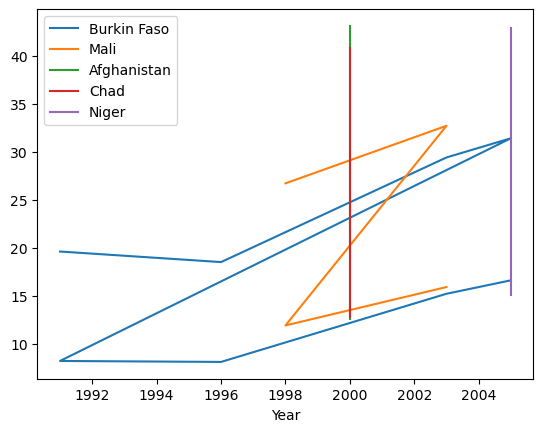

In [128]:
axes = plt.gca()
Burkin_Faso_adult_lit.plot.line(x='Year', y='Percent_Value', label='Burkin Faso', ax=axes);
Mali_adult_lit.plot.line(x='Year', y='Percent_Value', label='Mali', ax=axes);
Afghanistan_adult_lit.plot.line(x='Year', y='Percent_Value', label='Afghanistan', ax=axes);
Chad_adult_lit.plot.line(x='Year', y='Percent_Value', label='Chad', ax=axes);
Niger_adult_lit.plot.line(x='Year', y='Percent_Value', label='Niger', ax=axes);

**Burkin Faso has the average lowest adult literacy rate which is the blue line**

**   **

**Below is a line graph of the countries with the highest average adult literacy rate for both genders**

In [138]:
Estonia_adult_lit = adult_lit[adult_lit['Country']=='Estonia']

In [137]:
Cuba_adult_lit = adult_lit[adult_lit['Country']=='Cuba']

In [139]:
Kazakhstan_adult_lit = adult_lit[adult_lit['Country']=='Kazakhstan']

In [140]:
Latvia_adult_lit = adult_lit[adult_lit['Country']=='Latvia']

In [141]:
Belarus_adult_lit = adult_lit[adult_lit['Country']=='Belarus']

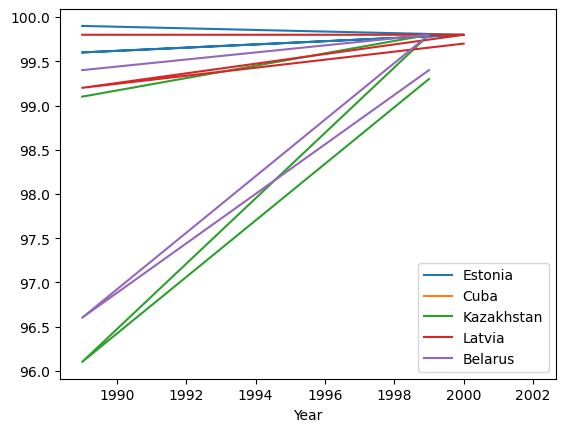

In [143]:
axes = plt.gca()
Estonia_adult_lit.plot.line(x='Year', y='Percent_Value', label='Estonia', ax=axes);
Cuba_adult_lit.plot.line(x='Year', y='Percent_Value', label='Cuba', ax=axes);
Kazakhstan_adult_lit.plot.line(x='Year', y='Percent_Value', label='Kazakhstan', ax=axes);
Latvia_adult_lit.plot.line(x='Year', y='Percent_Value', label='Latvia', ax=axes);
Belarus_adult_lit.plot.line(x='Year', y='Percent_Value', label='Belarus', ax=axes);


**Estonia has the highest adult literacy rate**

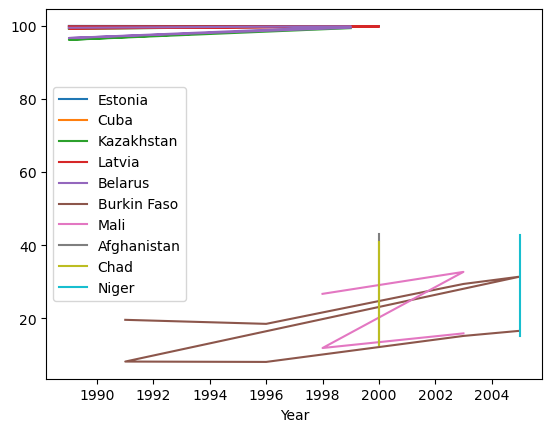

In [144]:
axes = plt.gca()
Estonia_adult_lit.plot.line(x='Year', y='Percent_Value', label='Estonia', ax=axes);
Cuba_adult_lit.plot.line(x='Year', y='Percent_Value', label='Cuba', ax=axes);
Kazakhstan_adult_lit.plot.line(x='Year', y='Percent_Value', label='Kazakhstan', ax=axes);
Latvia_adult_lit.plot.line(x='Year', y='Percent_Value', label='Latvia', ax=axes);
Belarus_adult_lit.plot.line(x='Year', y='Percent_Value', label='Belarus', ax=axes);
Burkin_Faso_adult_lit.plot.line(x='Year', y='Percent_Value', label='Burkin Faso', ax=axes);
Mali_adult_lit.plot.line(x='Year', y='Percent_Value', label='Mali', ax=axes);
Afghanistan_adult_lit.plot.line(x='Year', y='Percent_Value', label='Afghanistan', ax=axes);
Chad_adult_lit.plot.line(x='Year', y='Percent_Value', label='Chad', ax=axes);
Niger_adult_lit.plot.line(x='Year', y='Percent_Value', label='Niger', ax=axes);

**2. How does the adult literacy rate differ between females and males in the same country?**

In [7]:
# Average adult literacy rate for each gender in a Country
Fem_vs_Male_adult_lit = adult_lit.pivot_table(values = "Percent_Value", index = "Country", columns = 'Gender').reset_index()

In [10]:
Fem_vs_Male_adult_lit['Adults'] = ((Fem_vs_Male_adult_lit['Female 15+ yr'])+(Fem_vs_Male_adult_lit['Male 15+ yr']))/2

In [90]:
Fem_vs_Male_adult_lit.sort_values('Adults')

Gender,Country,Female 15+ yr,Male 15+ yr,Adults
19,Burkina Faso,12.025,24.725,18.375
72,Mali,13.900,29.700,21.800
25,Chad,12.800,40.800,26.800
0,Afghanistan,12.600,43.100,27.850
85,Niger,15.100,42.900,29.000
...,...,...,...,...
127,Ukraine,99.200,99.700,99.450
109,Slovenia,99.550,99.650,99.600
61,Latvia,99.450,99.800,99.625
41,Estonia,99.700,99.850,99.775


**3. How does the female and male adult literacy rate differ on average in the same year?**

In [154]:
#This the percent value for both females and males in all countries for each year
adult_lit_pivot_year = adult_lit.pivot_table(values = "Percent_Value", index = "Year", columns = 'Gender').reset_index()

In [155]:
adult_lit_pivot_year['Adults'] = ((adult_lit_pivot_year['Female 15+ yr'])+(adult_lit_pivot_year['Male 15+ yr']))/2


In [156]:
adult_lit_pivot_year

Gender,Year,Female 15+ yr,Male 15+ yr,Adults
0,1985,80.325000,88.175000,84.250000
1,1986,52.525000,66.650000,59.587500
2,1987,51.600000,70.533333,61.066667
3,1988,27.425000,50.175000,38.800000
4,1989,95.810000,98.670000,97.240000
5,1990,74.657143,85.121429,79.889286
6,1991,66.252381,77.638095,71.945238
7,1992,75.960000,85.250000,80.605000
8,1993,76.066667,84.600000,80.333333
9,1994,60.825000,75.141667,67.983333


<Figure size 1000x600 with 0 Axes>

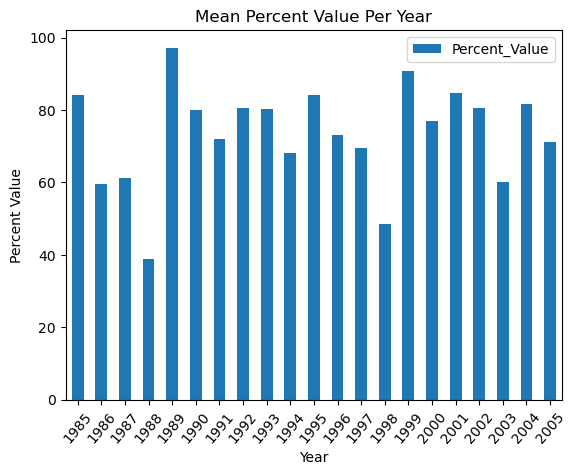

In [157]:
plt.figure(figsize = (10,6));

adult_lit.groupby(['Year'])[['Percent_Value']].mean().plot(kind = 'bar');
plt.title('Mean Percent Value Per Year');
plt.ylabel('Percent Value');
plt.xticks(rotation = 50);

When observing the countries with the highest adult literacy rate, we find the the lowest adult lit rate belong to females 15 years old +.

**Introducing GDP_df and merging with Adult_lit**

In [158]:
GDP_df = pd.read_csv('../data/gdp_per_capita.csv')

In [159]:
GDP_df = GDP_df.drop(['Value Footnotes'], axis = 1)

In [160]:
GDP_df = GDP_df.rename(columns = {'Country or Area' : 'Country', 'Value' : 'GDP_Per_Capita'})

In [152]:
adult_lit_GDP = pd.merge(GDP_df, adult_lit)

In [161]:
adult_lit_GDP

,Country,Year,GDP_Per_Capita,Gender,Percent_Value
0,Albania,2001,6441.449833,Female 15+ yr,98.3
1,Albania,2001,6441.449833,Male 15+ yr,99.2
2,Algeria,2002,9232.415784,Female 15+ yr,60.1
3,Algeria,2002,9232.415784,Male 15+ yr,79.6
4,Angola,2001,4746.660523,Female 15+ yr,54.2
...,...,...,...,...,...
355,Zambia,1990,2190.181724,Male 15+ yr,73.0
356,Zimbabwe,2004,1979.200783,Female 15+ yr,86.2
357,Zimbabwe,2004,1979.200783,Male 15+ yr,92.7
358,Zimbabwe,1992,2437.152908,Female 15+ yr,78.5


In [163]:
adult_lit_GDP = adult_lit_GDP.groupby(['Country', 'Year'])[['Percent_Value', 'GDP_Per_Capita']].mean().reset_index()

In [164]:
adult_lit_GDP


,Country,Year,Percent_Value,GDP_Per_Capita
0,Albania,2001,98.75,6441.449833
1,Algeria,2002,69.85,9232.415784
2,Angola,2001,68.55,4746.660523
3,Argentina,1991,96.10,15221.792147
4,Argentina,2001,97.20,17610.755386
...,...,...,...,...
175,Vietnam,1999,90.40,3455.112485
176,Zambia,1990,65.20,2190.181724
177,Zambia,1999,68.05,1968.215220
178,Zimbabwe,1992,83.70,2437.152908


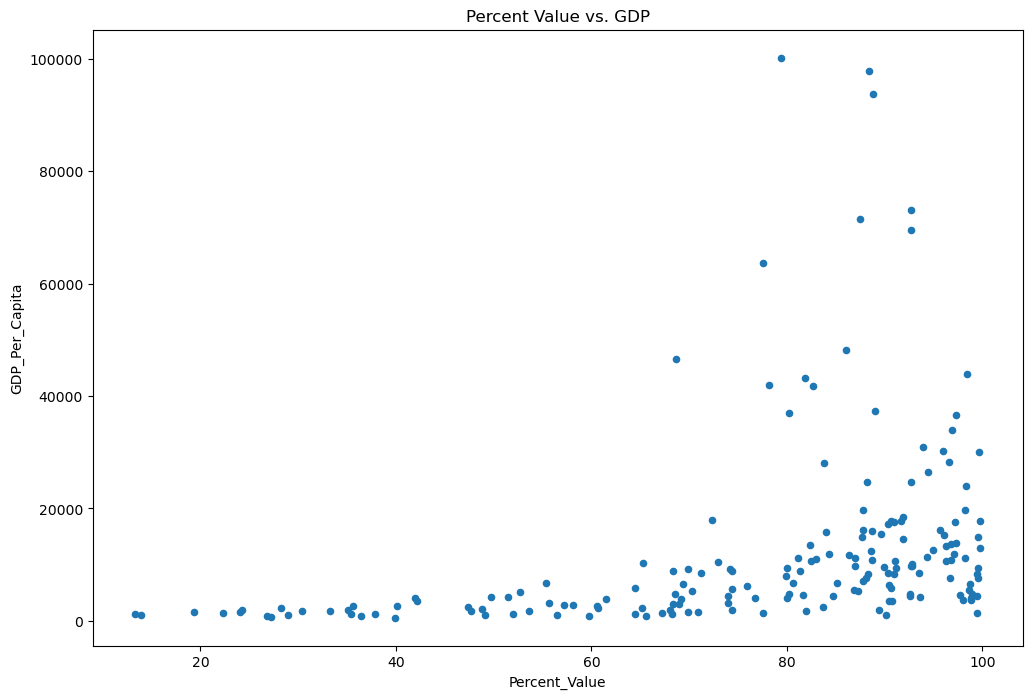

In [165]:
adult_lit_GDP.plot(kind = 'scatter', x = 'Percent_Value', y = 'GDP_Per_Capita', figsize = (12,8))
plt.title('Percent Value vs. GDP');

In [166]:
adult_lit_GDP[['Percent_Value', 'GDP_Per_Capita']].corr()

,Percent_Value,GDP_Per_Capita
Percent_Value,1.000000,0.332178
GDP_Per_Capita,0.332178,1.000000


**Introducing the Continent DF**

In [167]:
continents = pd.read_csv('../data/continents.csv')

In [168]:
world_adult_lit_GDP = pd.merge(adult_lit_GDP, continents)

In [169]:
world_adult_lit_GDP 

,Country,Year,Percent_Value,GDP_Per_Capita,Continent
0,Albania,2001,98.75,6441.449833,Europe
1,Algeria,2002,69.85,9232.415784,Africa
2,Angola,2001,68.55,4746.660523,Africa
3,Argentina,1991,96.10,15221.792147,South America
4,Argentina,2001,97.20,17610.755386,South America
...,...,...,...,...,...
175,Vietnam,1999,90.40,3455.112485,Asia
176,Zambia,1990,65.20,2190.181724,Africa
177,Zambia,1999,68.05,1968.215220,Africa
178,Zimbabwe,1992,83.70,2437.152908,Africa


**4.Which continent has the highest Adult Literacy**

In [170]:
world_adult_lit_GDP.groupby(['Continent'])[['Percent_Value']].mean()

,Percent_Value
Continent,
Africa,58.630328
Asia,79.011765
Europe,96.819565
North America,85.125000
Oceania,88.175000
South America,90.300000


<Figure size 1000x600 with 0 Axes>

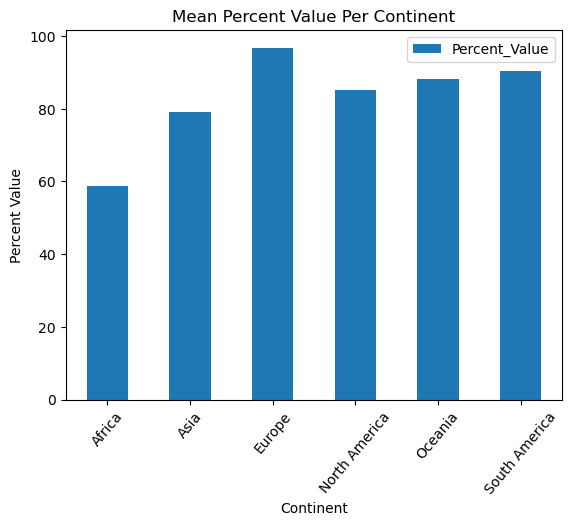

In [174]:
plt.figure(figsize = (10,6))

world_adult_lit_GDP.groupby(['Continent'])[['Percent_Value']].mean().plot(kind = 'bar')
plt.title('Mean Percent Value Per Continent')
plt.ylabel('Percent Value')

plt.xticks(rotation = 50);